In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')


In [4]:
import os
import requests

#key = os.environ['KAKAO_REST_API_KEY']

In [5]:
shelter = pd.read_csv('전국지진해일대피소표준데이터.csv', encoding = "CP949")

In [6]:
shelter.shape

(10305, 30)

In [6]:
shelter.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
0,내수2근린공원,지진대피소,옥외대피소,공원,서울특별시 종로구 경희궁4길,서울특별시 종로구 내수동 73-3,37.572387,126.971583,2192.0,664.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
1,대동세무고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 계동길 84-10,NaN,37.581920,126.987930,2000.0,1000.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
2,대신고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 사직로 9,NaN,37.572915,126.961601,4663.0,1413.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
3,덕성여자고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 50,NaN,37.577918,126.982867,4180.0,1260.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN
4,덕성여자중학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 49,NaN,37.577945,126.981778,6701.0,2030.0,...,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,NaN


In [7]:
shelter.columns

Index(['지진해일대피소명', '지진해일대피소구분', '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소',
       '소재지지번주소', '위도', '경도', '수용가능면적', '최대수용인원수', '지진해일대피소운영상태',
       '지진해일대피소전화번호', '부대편의시설', '주민대피지구명', '주민대피지구내가구수', '주민대피지구내거주인수',
       '주민대피지구내재해약자수', '내진적용여부', '내진설계등급', '해안선이격거리', '해발높이', '지진대피안내표지판수',
       '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'Unnamed: 29'],
      dtype='object')

In [8]:
shelter.isnull().sum()

지진해일대피소명            0
지진해일대피소구분           0
지진해일대피소유형           0
지진해일대피소유형구분         0
소재지도로명주소          926
소재지지번주소          5684
위도                 92
경도                 91
수용가능면적              0
최대수용인원수             0
지진해일대피소운영상태         0
지진해일대피소전화번호         0
부대편의시설           9861
주민대피지구명             0
주민대피지구내가구수       9763
주민대피지구내거주인수      9870
주민대피지구내재해약자수    10023
내진적용여부              0
내진설계등급          10021
해안선이격거리          9348
해발높이             9274
지진대피안내표지판수       7502
긴급대피장소안내표지판수     9270
지진대피로안내표지판수      9684
관리기관명               0
관리기관전화번호         3749
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 29     10305
dtype: int64

In [7]:
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].fillna('정보없음')

In [8]:
shelter['소재지도로명주소']

0            서울특별시 종로구 경희궁4길
1        서울특별시 종로구 계동길 84-10
2            서울특별시 종로구 사직로 9
3         서울특별시 종로구 율곡로3길 50
4         서울특별시 종로구 율곡로3길 49
                ...         
10300                   정보없음
10301                   정보없음
10302                   정보없음
10303                   정보없음
10304     대구광역시 수성구 범안로4길 46
Name: 소재지도로명주소, Length: 10305, dtype: object

In [11]:
shelter.isnull().sum()

지진해일대피소명            0
지진해일대피소구분           0
지진해일대피소유형           0
지진해일대피소유형구분         0
소재지도로명주소            0
소재지지번주소          5684
위도                 92
경도                 91
수용가능면적              0
최대수용인원수             0
지진해일대피소운영상태         0
지진해일대피소전화번호         0
부대편의시설           9861
주민대피지구명             0
주민대피지구내가구수       9763
주민대피지구내거주인수      9870
주민대피지구내재해약자수    10023
내진적용여부              0
내진설계등급          10021
해안선이격거리          9348
해발높이             9274
지진대피안내표지판수       7502
긴급대피장소안내표지판수     9270
지진대피로안내표지판수      9684
관리기관명               0
관리기관전화번호         3749
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 29     10305
dtype: int64

In [9]:
# 소재지도로명주소 string타입으로 변형 
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].astype('str')

In [17]:
# 소재지도로명 띄어쓰기 기준으로 잘라 첫번째 덩어리만 area 컬럼에 저장
shelter['area'] = shelter['소재지도로명주소'].str.split(' ').str[0]

In [18]:
shelter_GG = shelter[(shelter['area']=='광주광역시')|(shelter['area']=='전라북도')|(shelter['area']=='전라남도')]

In [19]:
shelter.area.unique()

array(['서울특별시', '충청북도', '경기도', '인천광역시', '경상남도', '강원도', '전라북도', '광주광역시',
       '경상북도', '정보없음', '충청남도', '부산광역시', '대구광역시', '전라남도', '대전광역시', '울산광역시',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [20]:
shelter_GG.area.unique()

array(['전라북도', '광주광역시', '전라남도'], dtype=object)

In [21]:
len(shelter_GG)

1160

In [22]:
data = shelter_GG.isnull().sum()
pd.DataFrame(data)

,0
지진해일대피소명,0
지진해일대피소구분,0
지진해일대피소유형,0
지진해일대피소유형구분,0
소재지도로명주소,0
소재지지번주소,523
위도,3
경도,3
수용가능면적,0
최대수용인원수,0


In [23]:
nulls = shelter_GG[shelter_GG['위도'].isnull()]

In [2]:
# from geocoder import geocode

In [136]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(nulls['소재지도로명주소'][index])
#     lats.append(lat)
#     lngs.append(lng)

# nulls = nulls.assign(lat=lats, lng=lngs)

# nulls.head()


In [134]:
# nulls.to_csv('nulls.csv')

In [144]:
# LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [145]:
# def gc(address):
#     url = 'https://us1.locationiq.com/v1/search.php'
#     payload = {
#         'key': LOCATIONIQ_TOKEN,
#         'q': address,
#         'format': 'json'
#     }
#     response = requests.get(url, params=payload)
#     results = response.json()
#     if 'error' in results:
#         return None, None
#     coordinates = results[0]
#     return coordinates['lat'], coordinates['lon']

In [146]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = gc(nulls['소재지도로명주소'][index])
#     lats.append(lat or 0)
#     lngs.append(lng or 0)

# nulls = nulls.assign(위=lats, 경=lngs)

# nulls.head()

1 - 0
2 - 1
3 - 2


,Unnamed: 0,Unnamed: 0.1,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,...,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area,lat,lng,위,경
0,0,7151,장산중학교,지진대피소,옥외대피소,학교,전라남도 신안군 장산면 대리길 64,NaN,NaN,NaN,...,NaN,2019-07-01,5010000,전라남도 신안군,NaN,전라남도,NaN,NaN,34.89649,126.317144
1,1,7163,지명고등학교,지진대피소,옥외대피소,학교,전라남도 신안군 지도읍 선도길 92-26,NaN,NaN,NaN,...,NaN,2019-07-01,5010000,전라남도 신안군,NaN,전라남도,NaN,NaN,35.069345,126.162185
2,2,7176,비금중학교,지진대피소,옥외대피소,학교,전라남도 신안군 비금면 유옥유길 65,NaN,NaN,NaN,...,NaN,2019-07-01,5010000,전라남도 신안군,NaN,전라남도,NaN,NaN,34.89649,126.317144


In [147]:
# nulls.to_csv('nulls.csv')

In [24]:
nulls = pd.read_csv('nulls.csv')

In [25]:
nulls.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '지진해일대피소명', '지진해일대피소구분',
       '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '수용가능면적',
       '최대수용인원수', '지진해일대피소운영상태', '지진해일대피소전화번호', '부대편의시설', '주민대피지구명',
       '주민대피지구내가구수', '주민대피지구내거주인수', '주민대피지구내재해약자수', '내진적용여부', '내진설계등급',
       '해안선이격거리', '해발높이', '지진대피안내표지판수', '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명',
       '관리기관전화번호', '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 29', 'area', 'lat',
       'lng', '위', '경'],
      dtype='object')

In [26]:
drop_columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1','지진해일대피소구분',
       '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '수용가능면적',
       '최대수용인원수', '지진해일대피소운영상태', '지진해일대피소전화번호', '부대편의시설', '주민대피지구명',
       '주민대피지구내가구수', '주민대피지구내거주인수', '주민대피지구내재해약자수', '내진적용여부', '내진설계등급',
       '해안선이격거리', '해발높이', '지진대피안내표지판수', '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명',
       '관리기관전화번호', '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 29', 'area', 'lat',
       'lng']

In [27]:
nulls.shape
nulls.drop(drop_columns, axis=1)

,지진해일대피소명,위,경
0,장산중학교,34.896490,126.317144
1,지명고등학교,35.069345,126.162185
2,비금중학교,34.896490,126.317144


In [28]:
shelter_GG.head(1)

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,area
713,진안고원시장 주차장,지진대피소,옥외대피소,기타,전라북도 진안군 진안읍 시장길 8-17,전라북도 진안군 진안읍 군상리 406-8,35.792674,127.428799,836.0,253.0,...,1.0,NaN,3.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN,전라북도


In [29]:
shelter_G = shelter_GG.merge( nulls, how='left',on='지진해일대피소명')

In [30]:
len(shelter_G) #merge 잘 됐는지 확인 완료

1160

In [31]:
shelter_G.head()

,지진해일대피소명,지진해일대피소구분_x,지진해일대피소유형_x,지진해일대피소유형구분_x,소재지도로명주소_x,소재지지번주소_x,위도_x,경도_x,수용가능면적_x,최대수용인원수_x,...,관리기관전화번호_y,데이터기준일자_y,제공기관코드_y,제공기관명_y,Unnamed: 29_y,area_y,lat,lng,위,경
0,진안고원시장 주차장,지진대피소,옥외대피소,기타,전라북도 진안군 진안읍 시장길 8-17,전라북도 진안군 진안읍 군상리 406-8,35.792674,127.428799,836.0,253.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,진안공업고등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 96,전라북도 진안군 진안읍 군상리 1054,35.800302,127.417455,2605.0,789.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,진안여자중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 어영골길 33,전라북도 진안군 진안읍 군상리 1066,35.800940,127.421128,2854.0,864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,진안중앙초등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 학천변길 37-6,전라북도 진안군 진안읍 군상리 222,35.795329,127.435541,3962.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,진안중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 86,전라북도 진안군 진안읍 군상리 1053-4,35.799804,127.418578,5159.0,1563.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
shelter_G.columns

Index(['지진해일대피소명', '지진해일대피소구분_x', '지진해일대피소유형_x', '지진해일대피소유형구분_x', '소재지도로명주소_x',
       '소재지지번주소_x', '위도_x', '경도_x', '수용가능면적_x', '최대수용인원수_x', '지진해일대피소운영상태_x',
       '지진해일대피소전화번호_x', '부대편의시설_x', '주민대피지구명_x', '주민대피지구내가구수_x',
       '주민대피지구내거주인수_x', '주민대피지구내재해약자수_x', '내진적용여부_x', '내진설계등급_x', '해안선이격거리_x',
       '해발높이_x', '지진대피안내표지판수_x', '긴급대피장소안내표지판수_x', '지진대피로안내표지판수_x', '관리기관명_x',
       '관리기관전화번호_x', '데이터기준일자_x', '제공기관코드_x', '제공기관명_x', 'Unnamed: 29_x',
       'area_x', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', '지진해일대피소구분_y',
       '지진해일대피소유형_y', '지진해일대피소유형구분_y', '소재지도로명주소_y', '소재지지번주소_y', '위도_y',
       '경도_y', '수용가능면적_y', '최대수용인원수_y', '지진해일대피소운영상태_y', '지진해일대피소전화번호_y',
       '부대편의시설_y', '주민대피지구명_y', '주민대피지구내가구수_y', '주민대피지구내거주인수_y',
       '주민대피지구내재해약자수_y', '내진적용여부_y', '내진설계등급_y', '해안선이격거리_y', '해발높이_y',
       '지진대피안내표지판수_y', '긴급대피장소안내표지판수_y', '지진대피로안내표지판수_y', '관리기관명_y',
       '관리기관전화번호_y', '데이터기준일자_y', '제공기관코드_y', '제공기관명_y', 'Unnamed: 29_y',
       'area_y', 'lat', 'lng', '위', '

### 코드 복붙했는데 나는 shelter_G 하면 left join시 변수가 중복되서 _x,_y가 붙어서 넘 힘들었음
- 그래서 검색을 통해 중복열 삭제하는 방법 찾음 
- https://codeday.me/ko/qa/20190531/676827.html 참고!

In [33]:
def drop_y(df):
    # list comprehension of the cols that end with '_y'
    to_drop = [x for x in df if x.endswith('_y')]
    df.drop(to_drop, axis=1, inplace=True)


In [34]:
drop_y(shelter_G)

In [35]:
shelter_G.columns

Index(['지진해일대피소명', '지진해일대피소구분_x', '지진해일대피소유형_x', '지진해일대피소유형구분_x', '소재지도로명주소_x',
       '소재지지번주소_x', '위도_x', '경도_x', '수용가능면적_x', '최대수용인원수_x', '지진해일대피소운영상태_x',
       '지진해일대피소전화번호_x', '부대편의시설_x', '주민대피지구명_x', '주민대피지구내가구수_x',
       '주민대피지구내거주인수_x', '주민대피지구내재해약자수_x', '내진적용여부_x', '내진설계등급_x', '해안선이격거리_x',
       '해발높이_x', '지진대피안내표지판수_x', '긴급대피장소안내표지판수_x', '지진대피로안내표지판수_x', '관리기관명_x',
       '관리기관전화번호_x', '데이터기준일자_x', '제공기관코드_x', '제공기관명_x', 'Unnamed: 29_x',
       'area_x', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'lat', 'lng',
       '위', '경'],
      dtype='object')

In [36]:
def rename_x(df):
    for col in df:
        if col.endswith('_x'):
            df.rename(columns={col:col.rstrip('_x')}, inplace=True)

In [37]:
rename_x(shelter_G)

In [38]:
def rename_y(df):
    for col in df:
        if col.endswith('_y'):
            df.rename(columns={col:col.rstrip('_y')}, inplace=True)

In [39]:
rename_y(shelter_G)

In [40]:
shelter_G.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,제공기관명,Unnamed: 29,area,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,lat,lng,위,경
0,진안고원시장 주차장,지진대피소,옥외대피소,기타,전라북도 진안군 진안읍 시장길 8-17,전라북도 진안군 진안읍 군상리 406-8,35.792674,127.428799,836.0,253.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,진안공업고등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 96,전라북도 진안군 진안읍 군상리 1054,35.800302,127.417455,2605.0,789.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,진안여자중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 어영골길 33,전라북도 진안군 진안읍 군상리 1066,35.800940,127.421128,2854.0,864.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,진안중앙초등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 학천변길 37-6,전라북도 진안군 진안읍 군상리 222,35.795329,127.435541,3962.0,1200.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,진안중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 86,전라북도 진안군 진안읍 군상리 1053-4,35.799804,127.418578,5159.0,1563.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
shelter_G.columns

Index(['지진해일대피소명', '지진해일대피소구분', '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소',
       '소재지지번주소', '위도', '경도', '수용가능면적', '최대수용인원수', '지진해일대피소운영상태',
       '지진해일대피소전화번호', '부대편의시설', '주민대피지구명', '주민대피지구내가구수', '주민대피지구내거주인수',
       '주민대피지구내재해약자수', '내진적용여부', '내진설계등급', '해안선이격거리', '해발높이', '지진대피안내표지판수',
       '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'Unnamed: 29', 'area', 'Unnamed: 0', 'Unnamed: 0.1',
       'Unnamed: 0.1.1', 'lat', 'lng', '위', '경'],
      dtype='object')

In [42]:
shelter_G['위'].isnull().sum()

1156

In [43]:
shelter_G['위도'].isnull().sum()

3

In [44]:
shelter_G['위도'] = shelter_G['위도'].fillna(shelter_G['위'])

In [45]:
shelter_G['위도'].isnull().sum()

0

In [46]:
shelter_G['경도'] = shelter_G['경도'].fillna(shelter_G['경'])

In [47]:
pd.DataFrame(shelter_G.isnull().sum())

,0
지진해일대피소명,0
지진해일대피소구분,0
지진해일대피소유형,0
지진해일대피소유형구분,0
소재지도로명주소,0
소재지지번주소,523
위도,0
경도,0
수용가능면적,0
최대수용인원수,0


In [48]:
shelter_GG['지진해일대피소유형'].unique()

array(['옥외대피소', '실내대피소', '옥외대피장소'], dtype=object)

NameError: name 'pylab' is not defined

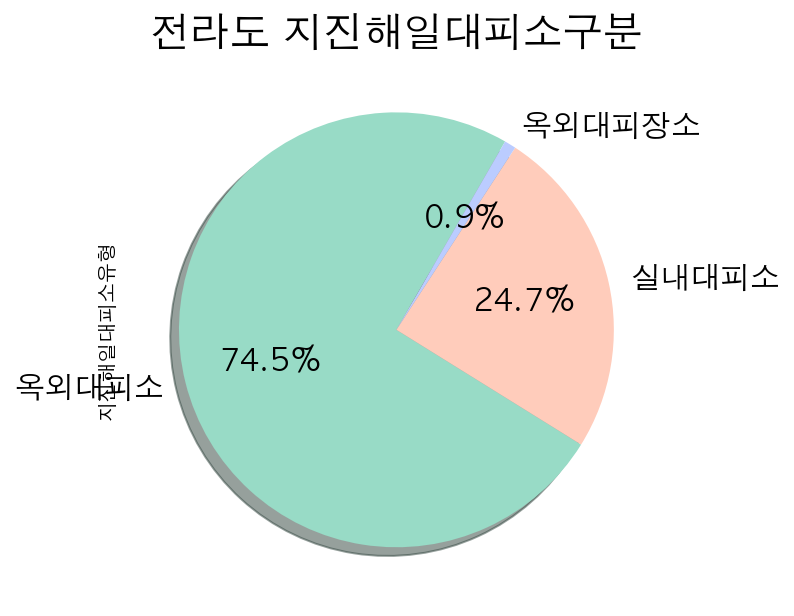

In [49]:
labels=['옥외대피소', '실내대피소', '옥외대피장소']
shelter_GG['지진해일대피소유형'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB','#BBCCFF']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    # ,explode = (0,0.5) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

In [312]:
# 내진설계 분석
for_seismic = shelter_G[shelter_G['지진해일대피소유형']=='실내대피소']

In [314]:
seismic_design = len(for_seismic[for_seismic['내진적용여부']=='적용'])/len(for_seismic)*100
print('전라, 전라지역 내진설계 비율 =', seismic_design, '%')

전라, 전라지역 내진설계 비율 = 77.97202797202797 %


NameError: name 'pylab' is not defined

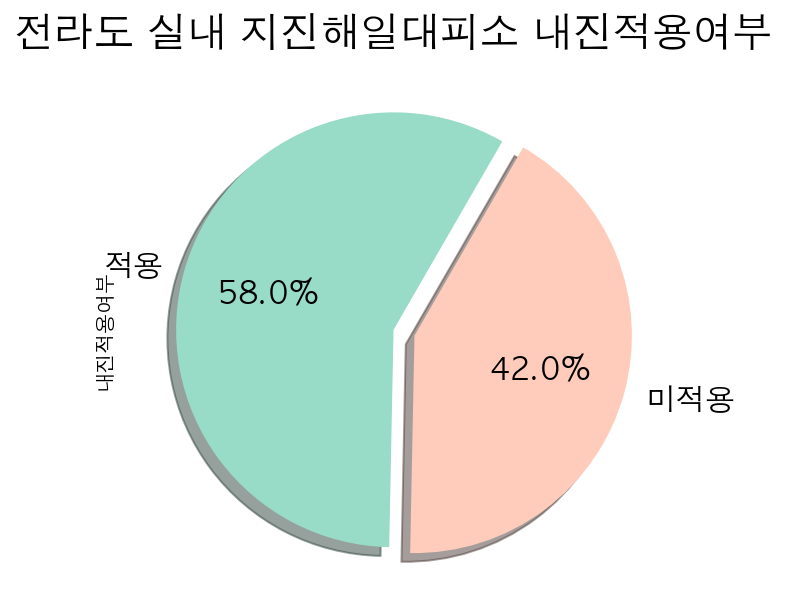

In [318]:
labels=['적용', '미적용']   #항상 파이그래프 보면서 labe순서 제대로 설정했는지 확인 
shelter_G['내진적용여부'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB'] #색깔 지정 (색깔 코드 인터넷 검색)
                    ,startangle = 60                #시작 각도 설정
                    ,shadow = True                  #그림자 생성
                    ,autopct = '%1.1f%%'            # 퍼센테이지 소숫점 설정
                    ,explode = (0,0.1)              # 한 파트 톡 튀어 나오게 만들기 (꼭 파트의 수와 동일해야함 안그럼 오류 EG)4개로 구분되면 (0, 0, 0, 0.1)로 기재)
                    ,figsize=(5, 5)                 # 그래프 사이즈 설정 
                    ,fontsize = 15)                 # 글씨 크기 설정
plt.title('전라도 실내 지진해일대피소 내진적용여부', fontsize=20)   #제목명, 제목 사이즈 설정
pylab.ylabel('')    # y축 설명 없애기 

In [82]:
# 지진해일 대피소 구분 분석
len(shelter_G[shelter_G['지진해일대피소구분']=='지진대피소'])

1160

NameError: name 'pylab' is not defined

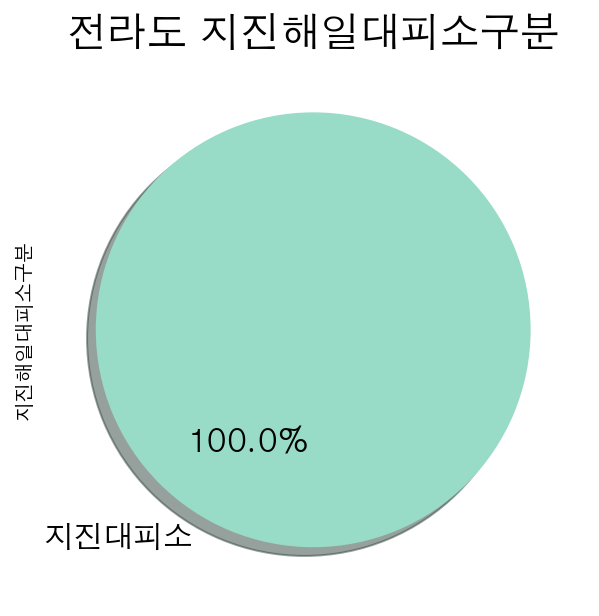

In [83]:
labels=['지진대피소', '지진해일대피소']
shelter_G['지진해일대피소구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    #,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

In [84]:
# 지진해일대피소유형 분석
shelter_G['지진해일대피소유형구분'].unique()

array(['기타', '운동장', '학교', '체육관', '공원'], dtype=object)

NameError: name 'pylab' is not defined

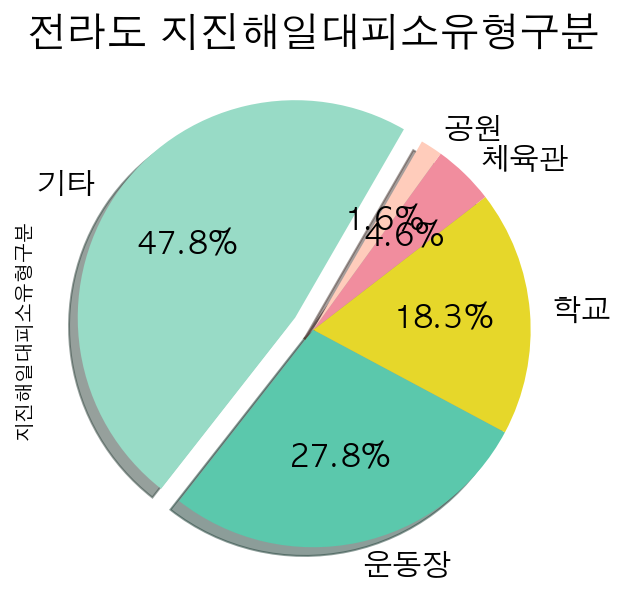

In [53]:
labels=['기타', '운동장', '학교', '체육관', '공원']
shelter_G['지진해일대피소유형구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0,0,0,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소유형구분', fontsize=20)
pylab.ylabel('')

In [54]:
shelter_G['지진해일대피소운영상태'].unique()

array(['Y'], dtype=object)

NameError: name 'pylab' is not defined

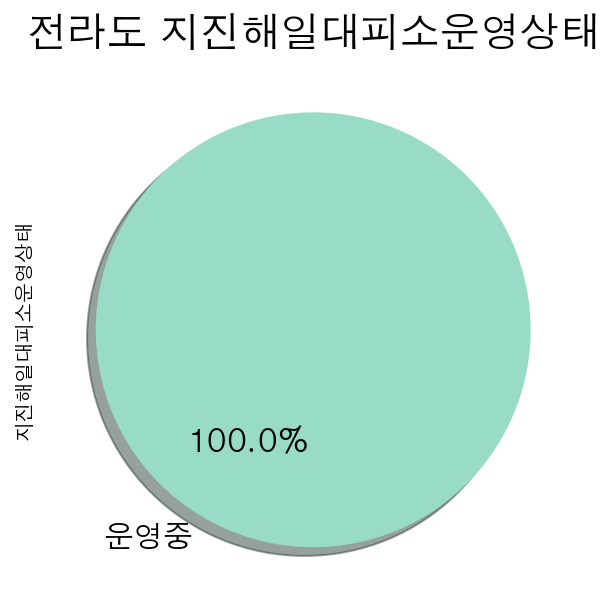

In [55]:
labels=['운영중']
shelter_G['지진해일대피소운영상태'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    #,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소운영상태', fontsize=20)
pylab.ylabel('')

In [85]:
# 전라도 지역분석
shelter_G['area'].unique()

array(['전라북도', '광주광역시', '전라남도'], dtype=object)

In [86]:
shelter_G[shelter_G['area']=='전라북도']

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,제공기관명,Unnamed: 29,area,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,lat,lng,위,경
0,진안고원시장 주차장,지진대피소,옥외대피소,기타,전라북도 진안군 진안읍 시장길 8-17,전라북도 진안군 진안읍 군상리 406-8,35.792674,127.428799,836.0,253.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,진안공업고등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 96,전라북도 진안군 진안읍 군상리 1054,35.800302,127.417455,2605.0,789.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,진안여자중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 어영골길 33,전라북도 진안군 진안읍 군상리 1066,35.800940,127.421128,2854.0,864.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,진안중앙초등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 학천변길 37-6,전라북도 진안군 진안읍 군상리 222,35.795329,127.435541,3962.0,1200.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,진안중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 86,전라북도 진안군 진안읍 군상리 1053-4,35.799804,127.418578,5159.0,1563.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,진안공설운동장 주차장(국궁장),지진대피소,옥외대피소,기타,전라북도 진안군 진안읍 진무로 1054-21,전라북도 진안군 진안읍 군하리 58,35.787996,127.428521,2230.0,675.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,진안군청 주차장,지진대피소,옥외대피소,기타,전라북도 진안군 진안읍 중앙로 67,전라북도 진안군 진안읍 군하리 97-4,35.791474,127.424990,1233.0,373.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,진안제일고등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 대광3길 25-5,전라북도 진안군 진안읍 군하리 386,35.786467,127.421056,3515.0,1065.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,진안초등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 중앙로 55,전라북도 진안군 진안읍 군하리 129,35.790647,127.423850,3640.0,1103.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,오천초등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 죽산로 5,전라북도 진안군 진안읍 죽산리 4,35.776697,127.493025,3273.0,991.0,...,전라북도 진안군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'pylab' is not defined

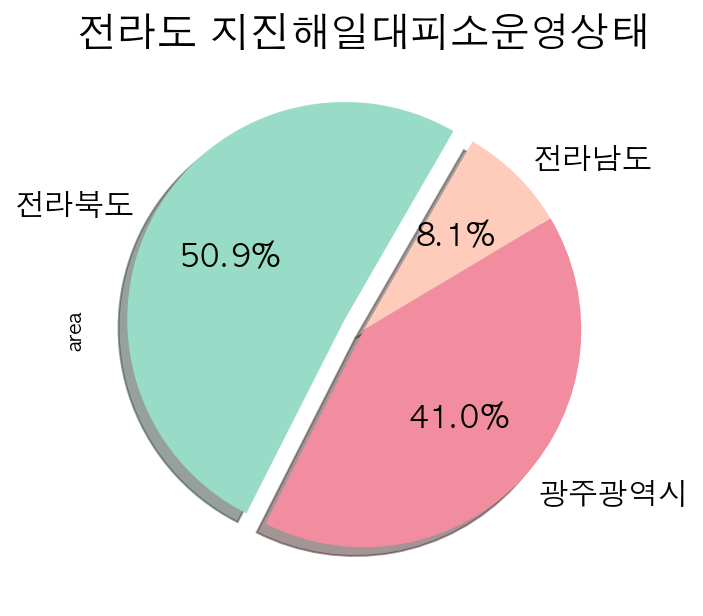

In [87]:
labels=['전라북도', '광주광역시', '전라남도']
shelter_G['area'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#F18D9E', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%' 
                    ,explode = (0.1,0, 0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소운영상태', fontsize=20)
pylab.ylabel('')

In [88]:
# 전라북도
shelter_G.sample(30)

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,제공기관명,Unnamed: 29,area,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,lat,lng,위,경
501,소양서초,지진대피소,옥외대피소,운동장,전라북도 완주군 소양면 명덕로 38,전라북도 완주군 소양면 명덕리 1002,35.927373,127.124038,3950.0,4788.0,...,전라북도 완주군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
972,재래시장(동),지진대피소,옥외대피소,기타,전라북도 고창군 고창읍 읍내리 366-11,전라북도 고창군 고창읍 읍내리 366-11,35.432271,126.699409,2300.0,697.0,...,전라북도 고창군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053,고창남중학교,지진대피소,옥외대피소,운동장,전라북도 고창군 성송면 향산리 79-1,전라북도 고창군 성송면 향산리 79-1,35.373540,126.647940,15382.0,46612.0,...,전라북도 고창군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
901,회현중학교,지진대피소,옥외대피소,운동장,"전라북도 군산시 회현면 대위로426, (대정리)",전라북도 군산시 회현면 대정리 102-1,35.912873,126.754728,871.0,270.0,...,전라북도 군산시,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
864,어린이 3공원,지진대피소,옥외대피소,공원,"전라북도 군산시 월명로354-21, (서흥남동)",전라북도 군산시 서흥남동 843-18,35.975945,126.716416,1349.0,409.0,...,전라북도 군산시,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,부영초등학교 강당,지진대피소,실내대피소,학교,전라남도 목포시 통일대로75번길 24 (옥암동),NaN,34.803422,126.433331,828.0,251.0,...,전라남도 목포시,NaN,전라남도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
981,월곡1공원,지진대피소,옥외대피소,공원,전라북도 고창군 고창읍 월곡리 1009-0,전라북도 고창군 고창읍 월곡리 1009-0,35.433521,126.713747,424851.0,12874.0,...,전라북도 고창군,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,동아여자중학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 오방로 16-10 (봉선동),NaN,35.125466,126.921242,11523.0,3492.0,...,광주광역시 남구,NaN,광주광역시,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,주월초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 서구 화운로 36(화정동),NaN,35.144544,126.883698,1466.0,1776.0,...,광주광역시 서구,NaN,광주광역시,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,입암초등학교,지진대피소,실내대피소,학교,전라북도 정읍시 입암면 입암중앙길25,NaN,35.504468,126.796442,540.0,160.0,...,전라북도 정읍시,NaN,전라북도,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
shelter_jrb = shelter_G[shelter_G['area']=='전라북도']

In [73]:
map = folium.Map(location=[35.9078, 127.7669], zoom_start = 6)

In [74]:
fg = folium.FeatureGroup(name = '전라북도지진해일대피소')

In [75]:
for lat, lon, name in zip(shelter_jrb['위도'], shelter_jrb['경도'], shelter_jrb['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))

In [76]:
map.add_child(fg)

In [77]:
map.save(outfile='전라북도.html')

In [78]:
# 전라남도
shelter_jrn = shelter_G[shelter_G['area']=='전라남도']
map = folium.Map(location=[35.9078, 127.7669], zoom_start = 6)
fg = folium.FeatureGroup(name = '전라남도지진해일대피소')
for lat, lon, name in zip(shelter_jrn['위도'], shelter_jrn['경도'], shelter_jrn['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))
map.add_child(fg) 
map.save(outfile='전라남도.html')

In [79]:
#광주
shelter_gj = shelter_G[shelter_G['area']=='광주광역시']
map = folium.Map(location=[35.9078, 127.7669], zoom_start = 6)
fg = folium.FeatureGroup(name = '광주광역시지진해일대피소')
for lat, lon, name in zip(shelter_gj['위도'], shelter_gj['경도'], shelter_gj['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))
map.add_child(fg) 
map.save(outfile='광주광역시.html')

# 인구조사 

In [127]:
ppl = pd.read_csv('인구수.csv', encoding = "CP949")

# http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3

In [128]:
ppl.head()

,행정구역(시군구)별,2019. 09
0,행정구역(시군구)별,총인구수 (명)
1,전국,51849253
2,서울특별시,9740398
3,종로구,151767
4,중구,126409


In [129]:
len(ppl)

280

In [130]:
ppl[(ppl['행정구역(시군구)별']=='행정구역(시군구)별')|(ppl['행정구역(시군구)별']=='광주광역시')|(ppl['행정구역(시군구)별']=='전라남도')|(ppl['행정구역(시군구)별']=='전라북도')]

,행정구역(시군구)별,2019. 09
0,행정구역(시군구)별,총인구수 (명)
65,광주광역시,1459632
187,전라북도,1822883
204,전라남도,1865915


In [132]:
# 분석 쉽도로 컬럼명 변경 
ppl = ppl.rename(columns={'행정구역(시군구)별': 'sigungu', '2019. 09': 'nop'}) #nop: number of people

In [133]:
#.iloc으로 [25번째 열까지, 모든 컬럼] 잘라내서 '서울' 테이블로 지정 
광주 = ppl.iloc[65:71, :]

In [134]:
광주['sigungu'] = '광주광역시' + ' ' + 광주.sigungu.str[0:] 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
광주

,sigungu,nop
65,광주광역시 광주광역시,1459632
66,광주광역시 동구,98189
67,광주광역시 서구,301455
68,광주광역시 남구,218030
69,광주광역시 북구,435379
70,광주광역시 광산구,406579


In [136]:
전라북도 = ppl.iloc[187:204]

In [137]:
전라북도['sigungu'] = '전라북도' + ' ' + 전라북도.sigungu.str[0:] 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
전라북도

,sigungu,nop
187,전라북도 전라북도,1822883
188,전라북도 전주시,654563
189,전라북도 완산구,340059
190,전라북도 덕진구,314504
191,전라북도 군산시,270880
192,전라북도 익산시,289121
193,전라북도 정읍시,110899
194,전라북도 남원시,81756
195,전라북도 김제시,84266
196,전라북도 완주군,92595


In [139]:
len(전라북도)

17

In [140]:
전라남도 = ppl.iloc[204:227]

In [141]:
len(전라남도)

23

In [142]:
전라남도['sigungu'] = '전라남도' + ' ' + 전라남도.sigungu.str[0:] 

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [143]:
전라남도

,sigungu,nop
204,전라남도 전라남도,1865915
205,전라남도 목포시,230039
206,전라남도 여수시,282188
207,전라남도 순천시,281171
208,전라남도 나주시,114476
209,전라남도 광양시,151240
210,전라남도 담양군,46153
211,전라남도 곡성군,29112
212,전라남도 구례군,26126
213,전라남도 고흥군,65165


In [144]:
ppl = pd.concat([광주, 전라북도, 전라남도], ignore_index=True)

In [145]:
ppl.sample(10)

,sigungu,nop
2,광주광역시 서구,301455
22,전라북도 부안군,53529
8,전라북도 완산구,340059
17,전라북도 무주군,24350
31,전라남도 구례군,26126
44,전라남도 진도군,30825
10,전라북도 군산시,270880
45,전라남도 신안군,40698
6,전라북도 전라북도,1822883
23,전라남도 전라남도,1865915


In [146]:
len(ppl)

46

In [147]:
# 제공기관명이 시이름 + 구이름 으로 되어 있어서 이 컬럼을 기준으로 join 할 예정
shelter_G.제공기관명.unique()

array(['전라북도 진안군', '광주광역시 남구', '전라남도 곡성군', '전라남도 영광군', '전라남도 장성군',
       '전라남도 보성군', '전라북도 임실군', '전라남도 담양군', '전라남도 해남군', '전라북도 익산시',
       '광주광역시 북구', '전라남도 목포시', '전라북도 완주군', '전라남도 무안군', '전라북도 정읍시',
       '전라남도 여수시', '전라북도 순창군', '전라남도 화순군', '전라북도 남원시', '전라남도 신안군',
       '광주광역시 서구', '전라남도 순천시', '전라남도 강진군', '전라북도 군산시', '전라북도 고창군',
       '전라남도 영암군', '전라남도 광양시'], dtype=object)

In [148]:
# 인구테이블과 join하기 위해 필요한 두개 컬럼만 shelter_ppl이라는 테이블로 저장
shelter_ppl = shelter_G[['최대수용인원수', '제공기관명']]

In [149]:
# 제공기관명으로 groupby해서 그 지역 내 모든 대피소 최대수용인원수 더하기
shelter_capacity= pd.DataFrame(shelter_ppl.groupby('제공기관명')['최대수용인원수'].sum())

In [150]:
shelter_capacity

,최대수용인원수
제공기관명,
광주광역시 남구,29720.000000
광주광역시 북구,227966.000000
광주광역시 서구,173800.000000
전라남도 강진군,47060.000000
전라남도 곡성군,6630.000000
전라남도 광양시,88546.000000
전라남도 담양군,40986.000000
전라남도 목포시,75510.000000
전라남도 무안군,18021.000000


In [151]:
# join 하기
shelter_capacity = ppl.merge(shelter_capacity, how='left', left_on=['sigungu'], right_on=['제공기관명'])

In [152]:
shelter_capacity.isnull().sum()

sigungu     0
nop         0
최대수용인원수    19
dtype: int64

In [153]:
shelter_capacity[shelter_capacity['최대수용인원수'].isnull()]
# 16 결측치

,sigungu,nop,최대수용인원수
0,광주광역시 광주광역시,1459632,NaN
1,광주광역시 동구,98189,NaN
5,광주광역시 광산구,406579,NaN
6,전라북도 전라북도,1822883,NaN
7,전라북도 전주시,654563,NaN
8,전라북도 완산구,340059,NaN
9,전라북도 덕진구,314504,NaN
14,전라북도 김제시,84266,NaN
17,전라북도 무주군,24350,NaN
18,전라북도 장수군,22566,NaN


In [154]:
shelter_capacity.columns

Index(['sigungu', 'nop', '최대수용인원수'], dtype='object')

In [155]:
shelter_capacity.sample(10)

,sigungu,nop,최대수용인원수
7,전라북도 전주시,654563,NaN
17,전라북도 무주군,24350,NaN
44,전라남도 진도군,30825,NaN
12,전라북도 정읍시,110899,8755.0
29,전라남도 담양군,46153,40986.0
32,전라남도 고흥군,65165,NaN
8,전라북도 완산구,340059,NaN
18,전라북도 장수군,22566,NaN
16,전라북도 진안군,25686,28355.0
9,전라북도 덕진구,314504,NaN


In [156]:
# 분석 용이하게 하기 위해 컬럼명 변경 
shelter_capacity.rename(columns={'최대수용인원수':'max'}, inplace=True)

In [157]:
# max 컬럼이 float64이기때문에 정확한 비교를 위해 타입 변경
shelter_capacity['nop'] = shelter_capacity['nop'].astype('float64')

In [158]:
shelter_capacity[shelter_capacity['nop']>shelter_capacity['max']]

,sigungu,nop,max
2,광주광역시 서구,301455.0,173800.0
3,광주광역시 남구,218030.0,29720.0
4,광주광역시 북구,435379.0,227966.0
10,전라북도 군산시,270880.0,123951.0
11,전라북도 익산시,289121.0,159922.0
12,전라북도 정읍시,110899.0,8755.0
13,전라북도 남원시,81756.0,9689.0
24,전라남도 목포시,230039.0,75510.0
25,전라남도 여수시,282188.0,139214.0
26,전라남도 순천시,281171.0,192681.0


In [159]:
# 두 컬럼의 차를 diff 컬럼에 저장
shelter_capacity['diff'] = shelter_capacity['max']-shelter_capacity['nop']

In [160]:
shelter_capacity['diff'].max()

419430.0

In [161]:
shelter_capacity['diff'].min()

-207413.0

In [162]:
shelter_capacity[shelter_capacity['diff']==shelter_capacity['diff'].max()]

,sigungu,nop,max,diff
21,전라북도 고창군,55900.0,475330.0,419430.0


In [163]:
shelter_capacity[shelter_capacity['sigungu'] =='전라북도 고창군']

,sigungu,nop,max,diff
21,전라북도 고창군,55900.0,475330.0,419430.0


In [164]:
# 값이 마이너스면 불충분, 플러스면 충분으로 지정
shelter_capacity['capacity'] = shelter_capacity['diff'].apply(lambda x: '불충분' if x<0 else '충분' )

In [165]:
len(shelter_capacity[shelter_capacity['nop']>shelter_capacity['max']])

19

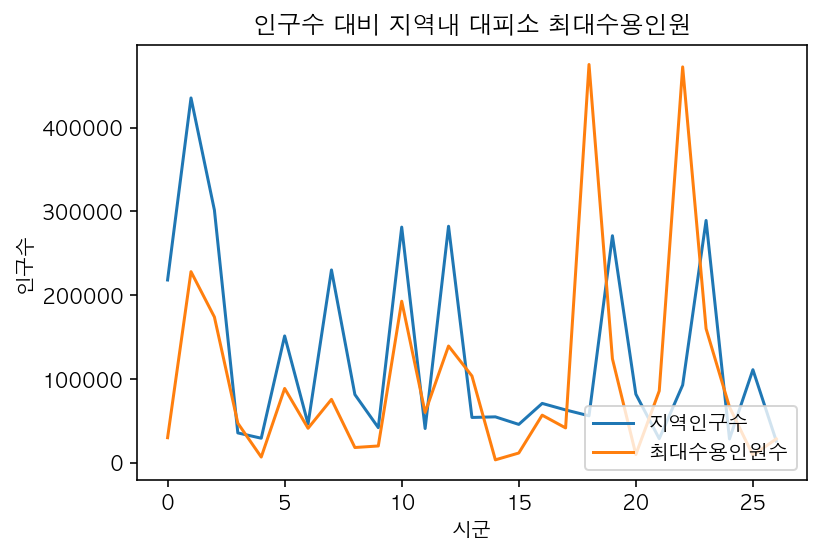

In [451]:
line_chart1 = plt.plot(shelter_capacity['nop'])
line_chart2 = plt.plot(shelter_capacity['max'])
plt.title('인구수 대비 지역내 대피소 최대수용인원')
plt.xlabel('시군')
plt.ylabel('인구수')
plt.legend(['지역인구수', '최대수용인원수'], loc = 4)
plt.show()

NameError: name 'pylab' is not defined

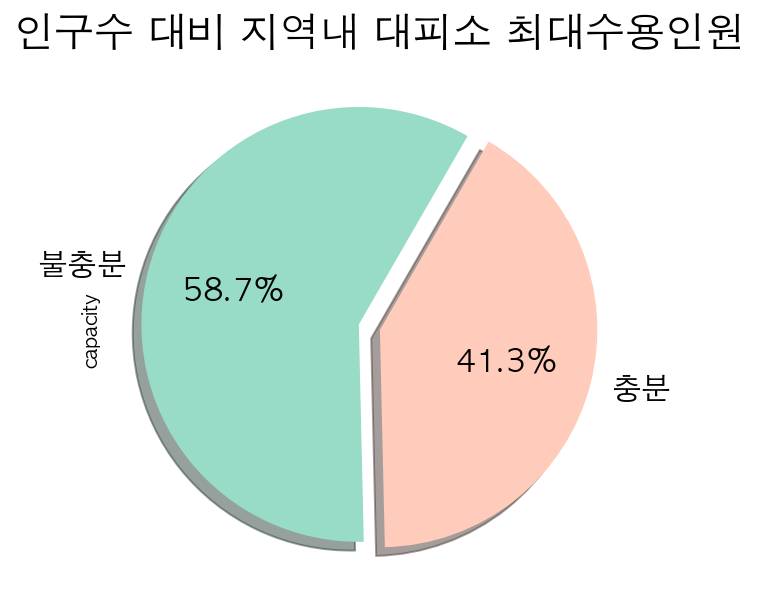

In [166]:
labels=['불충분', '충분']
shelter_capacity['capacity'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('인구수 대비 지역내 대피소 최대수용인원', fontsize=20)
pylab.ylabel('')

In [12]:


# ------------
# 내가 한 다른 방법
# gj = shelter[shelter['소재지도로명주소'].str.contains('광주광역시')]
# gj.shape

(94, 30)

In [13]:
# gj.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
741,광주학강초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 양림로 92 (양림동),NaN,35.138026,126.918254,7200.00,2181.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
742,방림초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 큰방림길 20 (방림동),NaN,35.133504,126.920998,1952.00,591.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
743,봉선중학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 봉선중길 14 (봉선동),NaN,35.129475,126.912499,5512.75,1670.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
744,봉선초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 봉선중앙로118번길 4 (봉선동),NaN,35.131125,126.911755,3030.00,918.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
745,광주불로초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 제석로80번길 58-5 (봉선동),NaN,35.120632,126.914204,6000.00,1818.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN


In [18]:
# gj.isnull().sum()

지진해일대피소명         0
지진해일대피소구분        0
지진해일대피소유형        0
지진해일대피소유형구분      0
소재지도로명주소         0
소재지지번주소         94
위도               0
경도               0
수용가능면적           0
최대수용인원수          0
지진해일대피소운영상태      0
지진해일대피소전화번호      0
부대편의시설          94
주민대피지구명          0
주민대피지구내가구수      94
주민대피지구내거주인수     94
주민대피지구내재해약자수    94
내진적용여부           0
내진설계등급          94
해안선이격거리         94
해발높이            94
지진대피안내표지판수      94
긴급대피장소안내표지판수    94
지진대피로안내표지판수     94
관리기관명            0
관리기관전화번호         0
데이터기준일자          0
제공기관코드           0
제공기관명            0
Unnamed: 29     94
dtype: int64

In [14]:
# gj['소재지도로명주소'].value_counts()

광주광역시 남구  금화로481번길 7  (월산동)     1
광주광역시 북구 서방로63번길 67  (우산동)      1
광주광역시 북구 일곡마을로 187  (일곡동)       1
광주광역시 남구  봉선중길 14  (봉선동)        1
광주광역시 서구 상무평화로 43(치평동)          1
                               ..
광주광역시 서구 경열로121번길 5(양동)         1
광주광역시 남구  고싸움로152번길 1  (지석동)    1
광주광역시 남구  월지길 7  (월성동)          1
광주광역시 서구 월산로 266(농성동)           1
광주광역시 북구 본촌택지로30번길 22  (본촌동)    1
Name: 소재지도로명주소, Length: 94, dtype: int64

In [15]:
# gj['수용가능면적'].unique()

array([ 7200.  ,  1952.  ,  5512.75,  3030.  ,  6000.  , 11523.  ,
        5624.  ,  3538.  ,  2000.  ,  2254.  ,  8295.  ,  2250.  ,
        1860.  ,  4718.7 ,  7001.  ,  3378.  ,  3730.  ,   560.  ,
        5995.  ,  1817.  ,  3607.  , 17466.  ,  8979.  ,   803.  ,
        5220.  ,  3411.  ,  9668.  ,  2784.  ,  3500.  ,  6758.  ,
        4570.  , 16606.  ,  7871.  ,  4800.  ,  3700.  ,  2810.  ,
        2633.  ,  2143.  ,  3000.  ,  3910.  ,  3890.  ,  3569.  ,
        6415.  ,  5620.  ,  4275.  , 10469.  ,  3920.  ,  3234.  ,
        4300.  ,  1650.  ,  6443.  ,  4590.  ,  1436.  ,   115.  ,
        2242.  ,  2880.  ,  2825.  ,  3630.  ,  3236.  ,  3037.  ,
       11862.  ,  3331.  ,  5095.  ,  3826.  ,  3248.  , 11100.  ,
        5821.  ,  5952.  ,  4633.  ,  3004.  ,  3233.  ,  3621.  ,
        1466.  ,  3292.  , 11958.  ,  4724.  ,  3537.  ,  3792.  ,
        2675.  ,  3047.  ,  2786.  ,  2873.  ,  2253.  ,  3150.  ,
        4200.  ,  2612.  ,  4907.  ,  3875.  ,  6456.  ,  3280

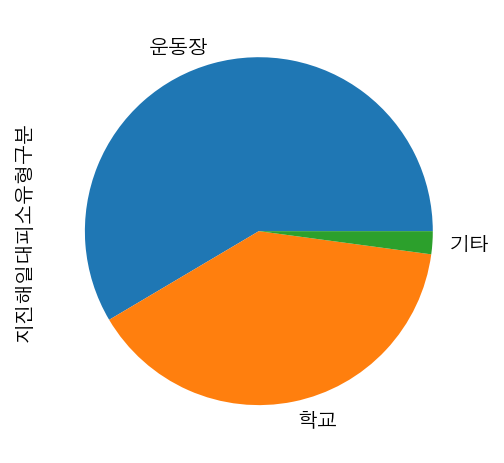

In [9]:
# data = gj['지진해일대피소유형구분'].value_counts()

# data.plot.pie()

# plt.show()

In [17]:
# pd.DataFrame(data)

,지진해일대피소유형구분
운동장,55
학교,37
기타,2


In [12]:
# gj[['위도','경도']].describe(include=np.number)
# coordinates = gj[['위도', '경도']]

# coordinates

,위도,경도
741,35.138026,126.918254
742,35.133504,126.920998
743,35.129475,126.912499
744,35.131125,126.911755
745,35.120632,126.914204
746,35.125466,126.921242
747,35.145538,126.899516
748,35.147519,126.898173
749,35.148563,126.890540
750,35.137771,126.900445


In [13]:
# import folium 
# from folium import Map
# from folium.plugins import HeatMap
# map = Map(location=[35.1, 126.8], zoom_start=11)

# # 지도에 위치 표시

# for lat, lng in coordinates.values:
#     marker = folium.Circle(
#         location=[lat, lng],
#         radius=5_00,
#         weight=1,
#         fill_color='#F00', #RGB
#         fill_opacity=0.3, #투명도 
#     )
#     marker.add_to(map)

# map

In [21]:
# # 지도 준비

# map = Map(location=[36.5, 127.5], zoom_start=7)

# # 히트맵 표시

# HeatMap(data=coordinates, radius=20).add_to(map)

# map

NameError: name 'pylab' is not defined

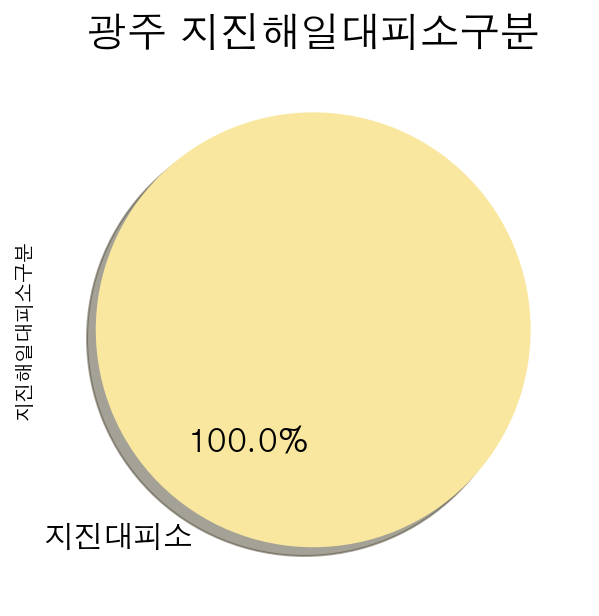

In [19]:
# labels=['지진대피소', '지진해일대피소']
# gj['지진해일대피소구분'].value_counts().plot.pie(labels = labels
#                     ,colors= ['#F9E79F', '#AED6F1']
#                     ,startangle = 60
#                     ,shadow = True
#                     ,autopct = '%1.1f%%'
#                     # ,explode = (0,0.1) 
#                     ,figsize=(5, 5)
#                     ,fontsize = 15)
# plt.title('광주 지진해일대피소구분', fontsize=20)

# pylab.ylabel('')

In [15]:
# gj.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
741,광주학강초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 양림로 92 (양림동),NaN,35.138026,126.918254,7200.00,2181.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
742,방림초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 큰방림길 20 (방림동),NaN,35.133504,126.920998,1952.00,591.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
743,봉선중학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 봉선중길 14 (봉선동),NaN,35.129475,126.912499,5512.75,1670.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
744,봉선초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 봉선중앙로118번길 4 (봉선동),NaN,35.131125,126.911755,3030.00,918.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN
745,광주불로초등학교 운동장,지진대피소,옥외대피소,운동장,광주광역시 남구 제석로80번길 58-5 (봉선동),NaN,35.120632,126.914204,6000.00,1818.0,...,NaN,NaN,NaN,NaN,광주광역시 남구청,062-607-2942,2019-04-02,3610000,광주광역시 남구,NaN


In [20]:
# jrd = shelter[shelter['소재지도로명주소'].str.contains('전라')]
# jrd.shape

(1066, 30)

In [21]:
# jrd_ = jrd[pd.notnull(jrd['소재지지번주소'])]

# jrd.shape, jrd_.shape

((1066, 30), (637, 30))

In [26]:
# jrd.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
713,진안고원시장 주차장,지진대피소,옥외대피소,기타,전라북도 진안군 진안읍 시장길 8-17,전라북도 진안군 진안읍 군상리 406-8,35.792674,127.428799,836.0,253.0,...,NaN,1.0,NaN,3.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN
714,진안공업고등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 96,전라북도 진안군 진안읍 군상리 1054,35.800302,127.417455,2605.0,789.0,...,NaN,1.0,NaN,1.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN
715,진안여자중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 어영골길 33,전라북도 진안군 진안읍 군상리 1066,35.800940,127.421128,2854.0,864.0,...,NaN,1.0,NaN,1.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN
716,진안중앙초등학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 학천변길 37-6,전라북도 진안군 진안읍 군상리 222,35.795329,127.435541,3962.0,1200.0,...,NaN,1.0,NaN,4.0,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN
717,진안중학교 운동장,지진대피소,옥외대피소,운동장,전라북도 진안군 진안읍 상역로 86,전라북도 진안군 진안읍 군상리 1053-4,35.799804,127.418578,5159.0,1563.0,...,NaN,1.0,NaN,NaN,전라북도 진안군,063-430-2587,2019-05-24,4730000,전라북도 진안군,NaN


In [22]:
# jrd.isnull().sum()

지진해일대피소명           0
지진해일대피소구분          0
지진해일대피소유형          0
지진해일대피소유형구분        0
소재지도로명주소           0
소재지지번주소          429
위도                 3
경도                 3
수용가능면적             0
최대수용인원수            0
지진해일대피소운영상태        0
지진해일대피소전화번호        0
부대편의시설          1026
주민대피지구명            0
주민대피지구내가구수       864
주민대피지구내거주인수      865
주민대피지구내재해약자수     987
내진적용여부             0
내진설계등급           913
해안선이격거리         1034
해발높이            1034
지진대피안내표지판수       814
긴급대피장소안내표지판수    1014
지진대피로안내표지판수     1007
관리기관명              0
관리기관전화번호         273
데이터기준일자            0
제공기관코드             0
제공기관명              0
Unnamed: 29     1066
dtype: int64

In [23]:
# nulls = jrd[jrd['위도'].isnull()]

In [24]:
# from geocoder import geocode

In [28]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(nulls['소재지도로명주소'][index])
#     lats.append(lat)
#     lngs.append(lng)

# nulls = nulls.assign(lat=lats, lng=lngs)

# nulls.head()



1 - 7151
2 - 7163
3 - 7176


,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,lat,lng
7151,장산중학교,지진대피소,옥외대피소,학교,전라남도 신안군 장산면 대리길 64,NaN,NaN,NaN,2138.0,5799.0,...,NaN,NaN,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,None,None
7163,지명고등학교,지진대피소,옥외대피소,학교,전라남도 신안군 지도읍 선도길 92-26,NaN,NaN,NaN,1983.0,1303.0,...,NaN,NaN,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,None,None
7176,비금중학교,지진대피소,옥외대피소,학교,전라남도 신안군 비금면 유옥유길 65,NaN,NaN,NaN,4034.0,1200.0,...,NaN,NaN,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,None,None


In [29]:
# nulls.to_csv('nulls.csv')

In [30]:
# LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [31]:
# def gc(address):
#     url = 'https://us1.locationiq.com/v1/search.php'
#     payload = {
#         'key': LOCATIONIQ_TOKEN,
#         'q': address,
#         'format': 'json'
#     }
#     response = requests.get(url, params=payload)
#     results = response.json()
#     if 'error' in results:
#         return None, None
#     coordinates = results[0]
#     return coordinates['lat'], coordinates['lon']

In [32]:
# lats = []
# lngs = []

# for i, index in enumerate(nulls.index):
#     print(i + 1, '-', index)
#     lat, lng = gc(nulls['소재지도로명주소'][index])
#     lats.append(lat or 0)
#     lngs.append(lng or 0)

# nulls = nulls.assign(위=lats, 경=lngs)

# nulls.head()

1 - 7151
2 - 7163
3 - 7176


,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,...,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,lat,lng,위,경
7151,장산중학교,지진대피소,옥외대피소,학교,전라남도 신안군 장산면 대리길 64,NaN,NaN,NaN,2138.0,5799.0,...,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,None,None,34.89649,126.317144
7163,지명고등학교,지진대피소,옥외대피소,학교,전라남도 신안군 지도읍 선도길 92-26,NaN,NaN,NaN,1983.0,1303.0,...,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,None,None,35.069345,126.162185
7176,비금중학교,지진대피소,옥외대피소,학교,전라남도 신안군 비금면 유옥유길 65,NaN,NaN,NaN,4034.0,1200.0,...,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,None,None,34.89649,126.317144


In [33]:
# nulls = pd.read_csv('nulls.csv')

In [34]:
# nulls.head()

,Unnamed: 0,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,...,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29,lat,lng
0,7151,장산중학교,지진대피소,옥외대피소,학교,전라남도 신안군 장산면 대리길 64,NaN,NaN,NaN,2138.0,...,NaN,NaN,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,NaN,NaN
1,7163,지명고등학교,지진대피소,옥외대피소,학교,전라남도 신안군 지도읍 선도길 92-26,NaN,NaN,NaN,1983.0,...,NaN,NaN,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,NaN,NaN
2,7176,비금중학교,지진대피소,옥외대피소,학교,전라남도 신안군 비금면 유옥유길 65,NaN,NaN,NaN,4034.0,...,NaN,NaN,전라남도 신안군청,NaN,2019-07-01,5010000,전라남도 신안군,NaN,NaN,NaN


In [36]:
# jrd1 = jrd.merge(nulls, how='left', on='지진해일대피소명')

In [37]:
# len(jrd1) #merge 확인

1066

In [50]:
# jrd1['위도'] = jrd1['lat'].fillna(jrd1['lat'])

In [51]:
# jrd1['경도'] = jrd1['lng'].fillna(jrd1['lng'])

In [52]:
# pd.DataFrame(jrd1.isnull().sum())

,0
지진해일대피소명,0
지진해일대피소구분_x,0
지진해일대피소유형_x,0
지진해일대피소유형구분_x,0
소재지도로명주소_x,0
소재지지번주소_x,429
위도_x,3
경도_x,3
수용가능면적_x,0
최대수용인원수_x,0


In [56]:
# 카카오 aip로 돌린 지도

In [35]:
# jrd2 = jrd_.sample(n=429, random_state=1)

# lats = []
# lngs = []

# for i, index in enumerate(jrd2.index):
#     print(i + 1, '-', index)
#     lat, lng = geocode(jrd['소재지지번주소'][index])
#     lats.append(lat)
#     lngs.append(lng)

# jrd2 = jrd2.assign(lat=lats, lng=lngs)

# jrd2.head()

In [55]:
# map = Map(location=[36.5, 127.5], zoom_start=7)

# data = jrd2[['lat', 'lng']].groupby(['lat', 'lng']).sum().reset_index().values.tolist()

# HeatMap(data=data, radius=20).add_to(map)

# for lat, lng in data:
#     marker = folium.Circle(
#         location=[lat, lng],
#         radius=500,
#         weight=1,
#         fill_color='#F00',
#         fill_opacity=0.3,
#     )
#     marker.add_to(map)

# map

In [57]:
# jrd['지진해일대피소유형'].unique()

array(['옥외대피소', '실내대피소', '옥외대피장소'], dtype=object)

NameError: name 'pylab' is not defined

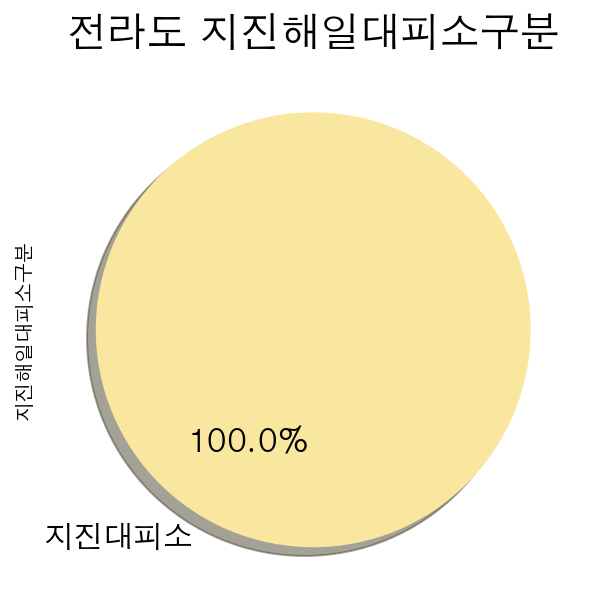

In [60]:
# labels=['지진대피소', '지진해일대피소']
# jrd['지진해일대피소구분'].value_counts().plot.pie(labels = labels
#                     ,colors= ['#F9E79F', '#AED6F1']
#                     ,startangle = 60
#                     ,shadow = True
#                     ,autopct = '%1.1f%%'
#                     #,explode = (0,0.1) 
#                     ,figsize=(5, 5)
#                     ,fontsize = 15)
# plt.title('전라도 지진해일대피소구분', fontsize=20)

# pylab.ylabel('')

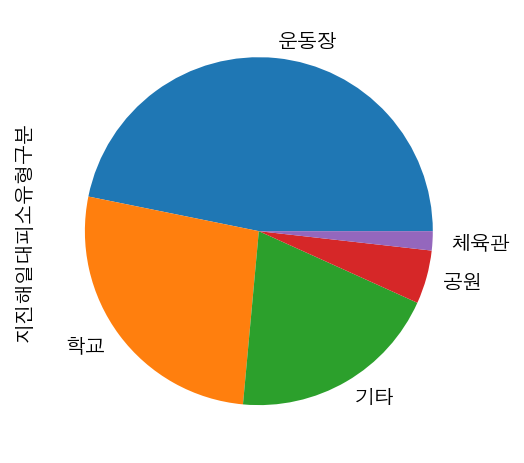

In [24]:
# data = jrd['지진해일대피소유형구분'].value_counts()

# data.plot.pie()

# plt.show()

In [33]:
# pd.DataFrame(data)

,지진해일대피소유형구분
운동장,499
학교,285
기타,210
공원,53
체육관,19


In [62]:
# # 내진설계 분석
# for_seismic = jrd[jrd['지진해일대피소유형']=='실내대피소']

In [63]:
# seismic_design = len(for_seismic[for_seismic['내진적용여부']=='적용'])/len(for_seismic)*100
# print('전라, 전라도지역 내진설계 비율 =', seismic_design, '%')

전라, 전라도지역 내진설계 비율 = 77.97202797202797 %


NameError: name 'pylab' is not defined

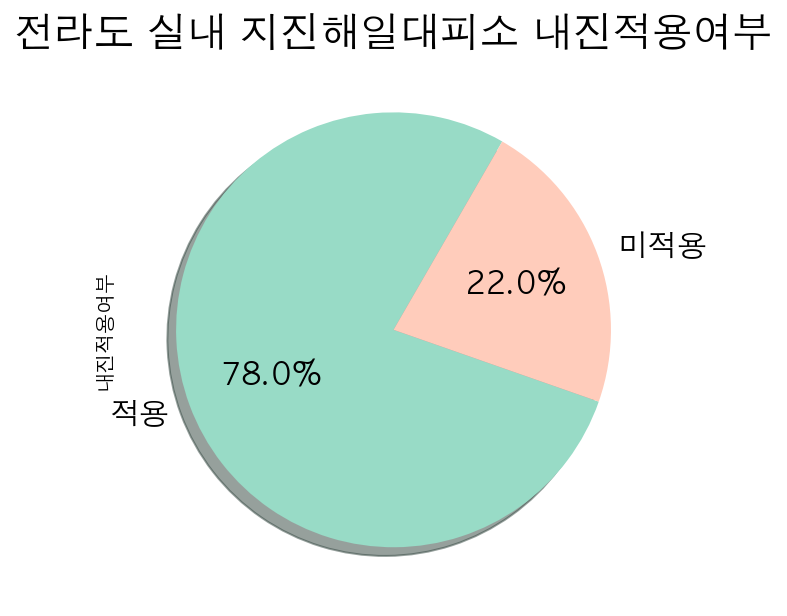

In [65]:
# labels=['적용', '미적용']   #항상 파이그래프 보면서 label순서 제대로 설정했는지 확인 
# for_seismic['내진적용여부'].value_counts().plot.pie(labels = labels
#                     ,colors= ['#98DBC6', '#FFCCBB'] #색깔 지정 (색깔 코드 인터넷 검색)
#                     ,startangle = 60                #시작 각도 설정
#                     ,shadow = True                  #그림자 생성
#                     ,autopct = '%1.1f%%'            # 퍼센테이지 소숫점 설정
#                     #,explode = (0,0.1)              # 한 파트 톡 튀어 나오게 만들기 (꼭 파트의 수와 동일해야함 안그럼 오류 EG)4개로 구분되면 (0, 0, 0, 0.1)로 기재)
#                     ,figsize=(5, 5)                 # 그래프 사이즈 설정 
#                     ,fontsize = 15)                 # 글씨 크기 설정
# plt.title('전라도 실내 지진해일대피소 내진적용여부', fontsize=20)   #제목명, 제목 사이즈 설정
# pylab.ylabel('')    # y축 설명 없애기 

배경지식
- 실외대피소: 지진 또는 해일이 발생할 경우 실외대피소에서 집합 후 안내 방송에 따라 다같이 이동하기 위한 용도
- 실내대피소: 집합 또는 이재민 수용을 위한 임시주거시설로 이용

NameError: name 'pylab' is not defined

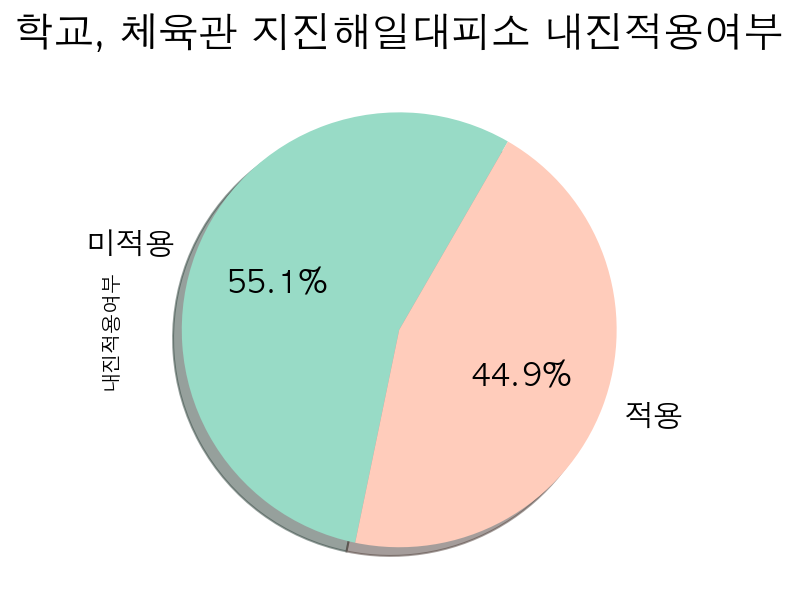

In [66]:
# labels=['미적용', '적용']
# jrd[(jrd['지진해일대피소유형구분']=='학교')|(['지진해일대피소유형구분']=='체육관')]['내진적용여부'].value_counts().plot.pie(labels = labels
#                     ,colors= ['#98DBC6', '#FFCCBB'] #색깔 지정 (색깔 코드 인터넷 검색)
#                     ,startangle = 60                #시작 각도 설정
#                     ,shadow = True                  #그림자 생성
#                     ,autopct = '%1.1f%%'            # 퍼센테이지 소숫점 설정
#                     # ,explode = (0,0.1)              # 한 파트 톡 튀어 나오게 만들기 (꼭 파트의 수와 동일해야함 안그럼 오류 EG)4개로 구분되면 (0, 0, 0, 0.1)로 기재)
#                     ,figsize=(5, 5)                 # 그래프 사이즈 설정 
#                     ,fontsize = 15)                 # 글씨 크기 설정
# plt.title('학교, 체육관 지진해일대피소 내진적용여부', fontsize=20)   #제목명, 제목 사이즈 설정
# pylab.ylabel('')    # y축 설명 없애기 

2. 지진해일 대피소 구분 분석
- 지진해일대피소 vs 지진대피소

In [67]:
len(jrd[jrd['지진해일대피소구분']=='지진대피소'])

1066

NameError: name 'pylab' is not defined

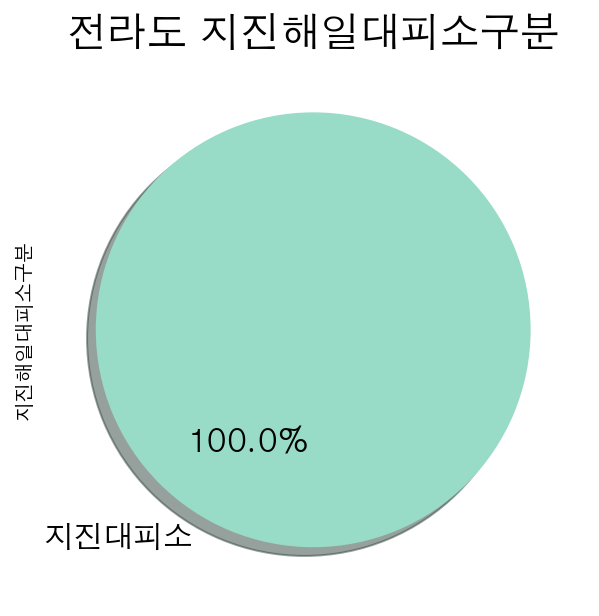

In [68]:
labels=['지진대피소', '지진해일대피소']
jrd['지진해일대피소구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    #,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

4. 지진해일대피소유형구분 분석

In [69]:
jrd['지진해일대피소유형구분'].unique()

array(['기타', '운동장', '학교', '체육관', '공원'], dtype=object)

NameError: name 'pylab' is not defined

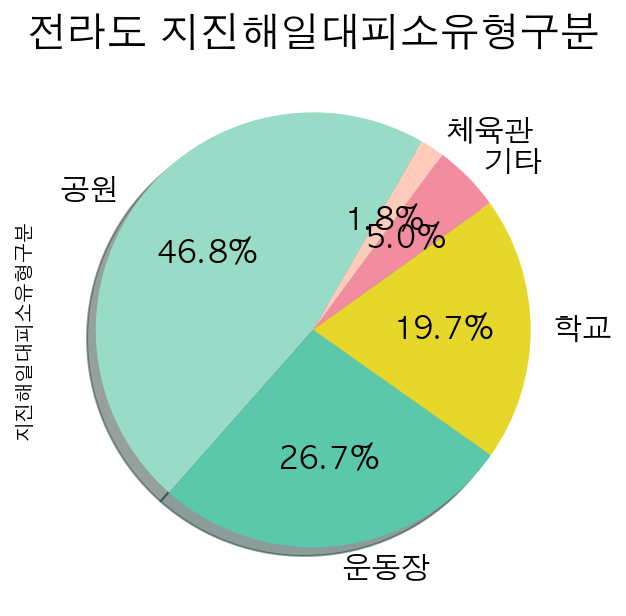

In [70]:
labels=['공원', '운동장', '학교', '기타', '체육관']
jrd['지진해일대피소유형구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    #,explode = (0.1,0,0,0,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소유형구분', fontsize=20)
pylab.ylabel('')

5. 지진해일대피소운영상태 분석

In [71]:
jrd['지진해일대피소운영상태'].unique()

array(['Y'], dtype=object)

NameError: name 'pylab' is not defined

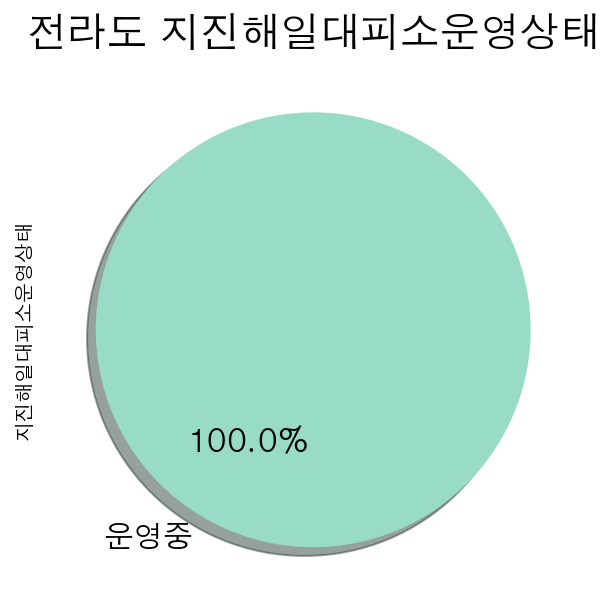

In [72]:
labels=['운영중', '비운영중']
jrd['지진해일대피소운영상태'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    #,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('전라도 지진해일대피소운영상태', fontsize=20)
pylab.ylabel('')

6. 지역별 대피소 수

In [73]:
jrd['area'].unique()

KeyError: 'area'